## Task1 Biopython

In [1]:
import requests
from io import StringIO
from Bio import Phylo
from matplotlib import pyplot as plt

In [2]:
r = requests.request(url='https://www.jasondavies.com/tree-of-life/life.txt', method='GET')
handle = StringIO(r.text)
tree = Phylo.read(handle, 'newick')
tree.ladderize()

### Draw tree with ascii

In [3]:
Phylo.draw_ascii(tree)

                     __________ Nanoarchaeum_equitans
                   _|
                  | |  _______ Pyrobaculum_aerophilum
                  | |_|
                  |   | _____ Aeropyrum_pernix
                  |   ||
                  |    |     _ Sulfolobus_tokodaii
                  |    |____|
              ____|         |__ Sulfolobus_solfataricus
             |    |
             |    |          , Thermoplasma_volcanium
             |    |  ________|
             |    | |        | Thermoplasma_acidophilum
             |    | |
             |    | |  ____ Archaeoglobus_fulgidus
             |    | |,|
             |    |_|||  _______ Halobacterium_sp._NRC-1
             |      |||_|
             |      ||  |   , Methanosarcina_acetivorans
             |      ||  |___|
             |      ||      | Methanosarcina_mazei
             |      ||
             |       |    , Pyrococcus_furiosus
  ___________|       | ___|
 |           |       ||   |, Pyrococcus_horikoshii
 |      

### Draw tree with matplotlib

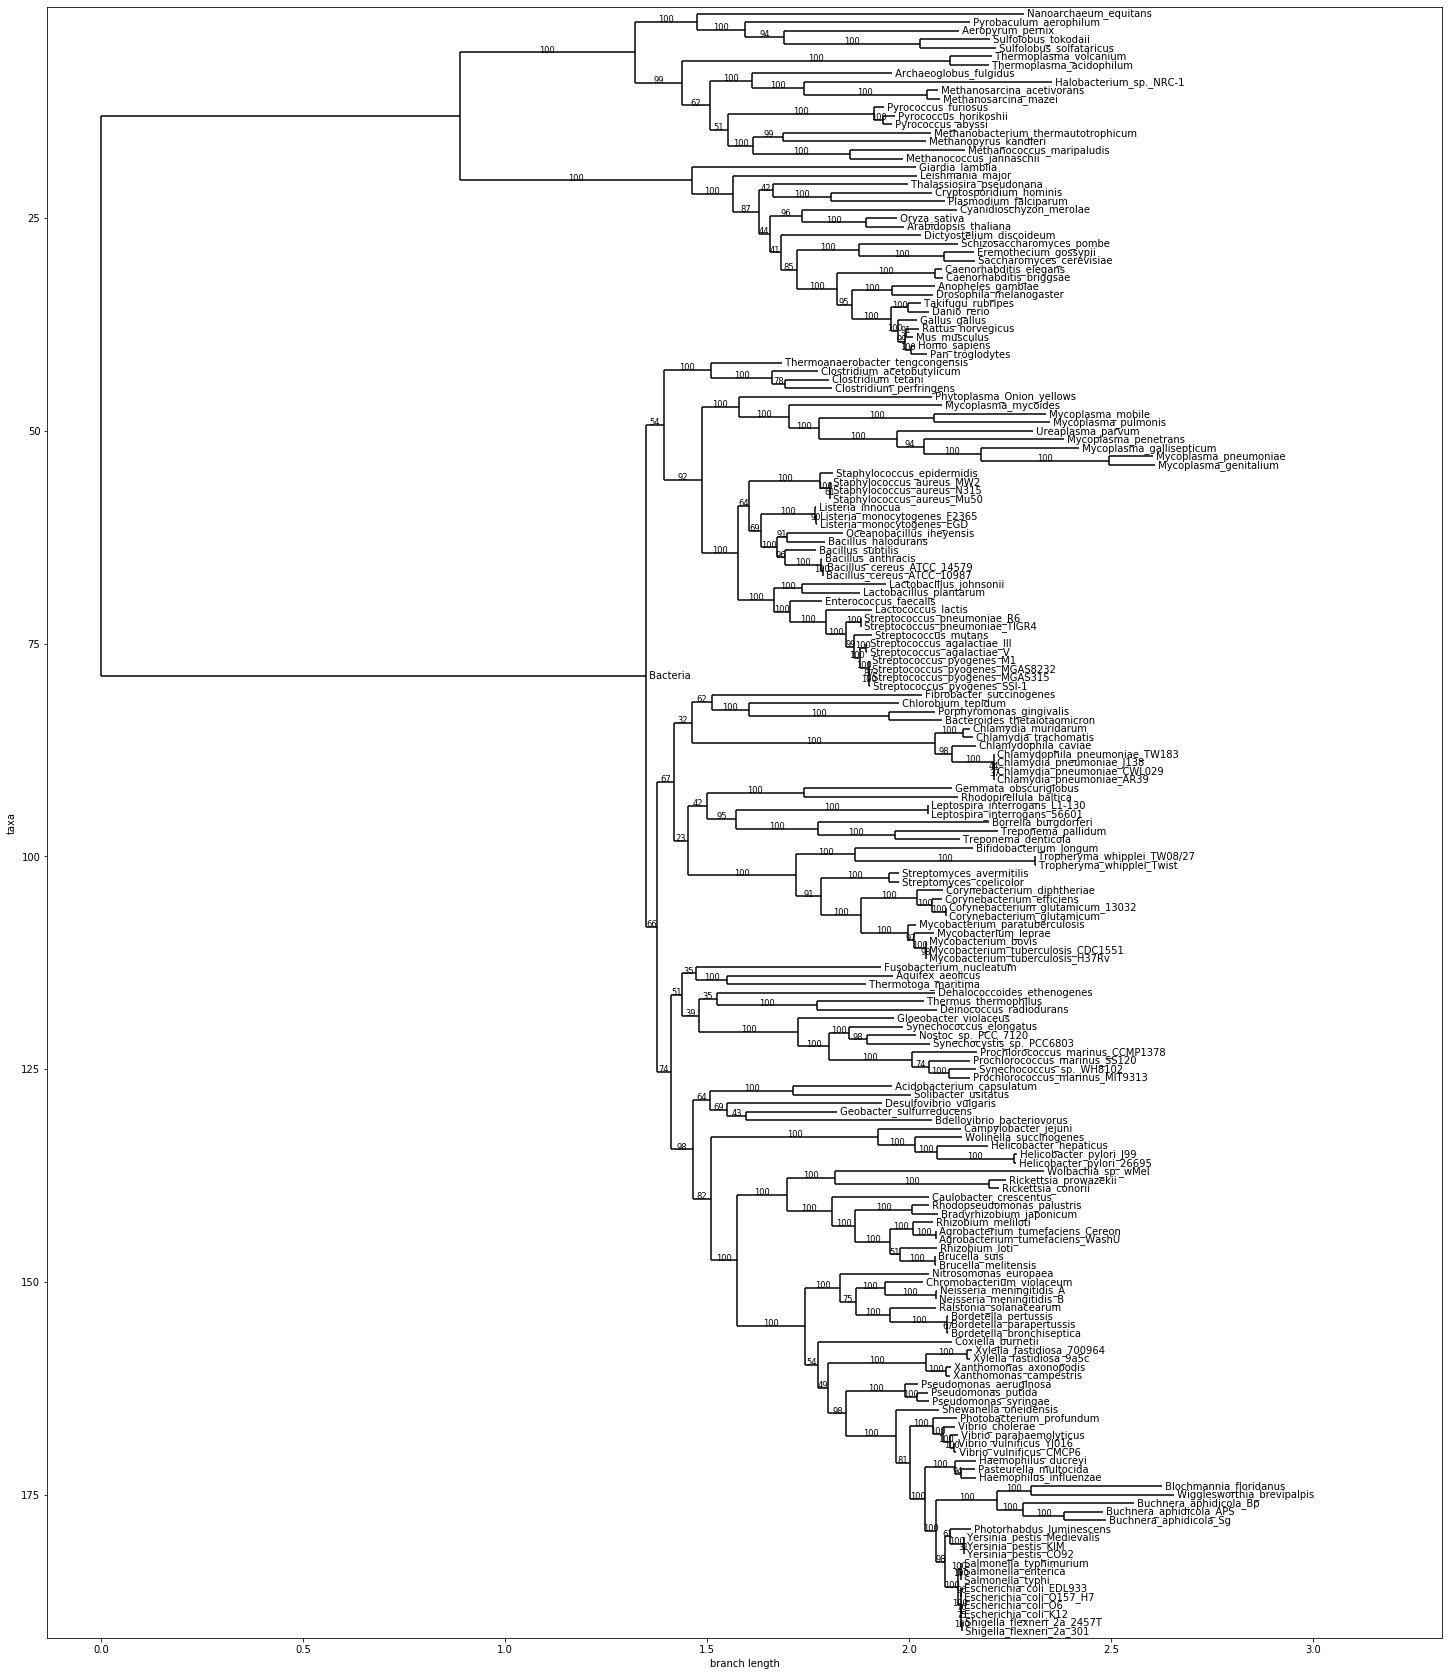

In [4]:
fig = plt.figure(figsize=(25, 30))
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, do_show=False, axes=axes)

### Save as png

In [5]:
fig.savefig("images/tree.png")

<img src="images/tree.png">

### Save as svg

In [6]:
fig.savefig("images/tree.svg")

<img src="images/tree.svg">

### PhyloXML

In [7]:
Phylo.write(tree, 'phylo_tree.xml', format='phyloxml')

1

## Task2 ETE toolkit

In [38]:
from ete3 import Tree, TreeStyle, AttrFace, faces

## parse the tree

In [39]:
t = Tree(r.text, format=1)

### Prune it

In [40]:
some_leafs = []
for i, leaf in enumerate(t):
    if i % 4 == 0:
        some_leafs.append(leaf.name)
print(len(some_leafs))

48


In [41]:
t.prune(some_leafs)

### Draw

In [42]:
print(t)


                                                /-Escherichia_coli_EDL933
                                             /-|
                                          /-|   \-Shigella_flexneri_2a_2457T
                                         |  |
                                       /-|   \-Salmonella_typhimurium
                                      |  |
                                    /-|   \-Photorhabdus_luminescens
                                   |  |
                                 /-|   \-Buchnera_aphidicola_APS
                                |  |
                              /-|   \-Haemophilus_ducreyi
                             |  |
                           /-|   \-Vibrio_cholerae
                          |  |
                        /-|   \-Pseudomonas_syringae
                       |  |
                     /-|   \-Xanthomonas_axonopodis
                    |  |
                    |  |   /-Neisseria_meningitidis_B
                    |   \-|
               

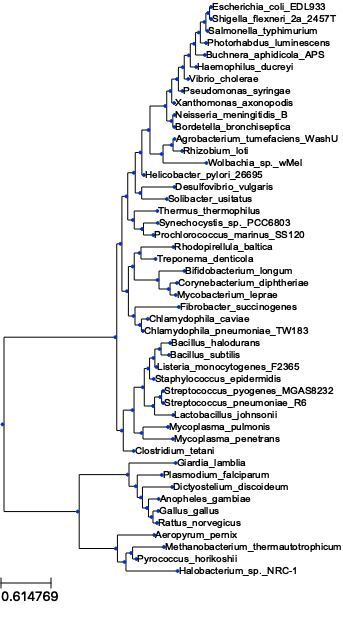

In [43]:
t.render("%%inline")

In [44]:
def custom_layout(node):
    if node.is_leaf():
        # If terminal node, draws its name
        name_face = AttrFace("name", fsize=12)
        faces.add_face_to_node(name_face, node, column=0, position="branch-right")

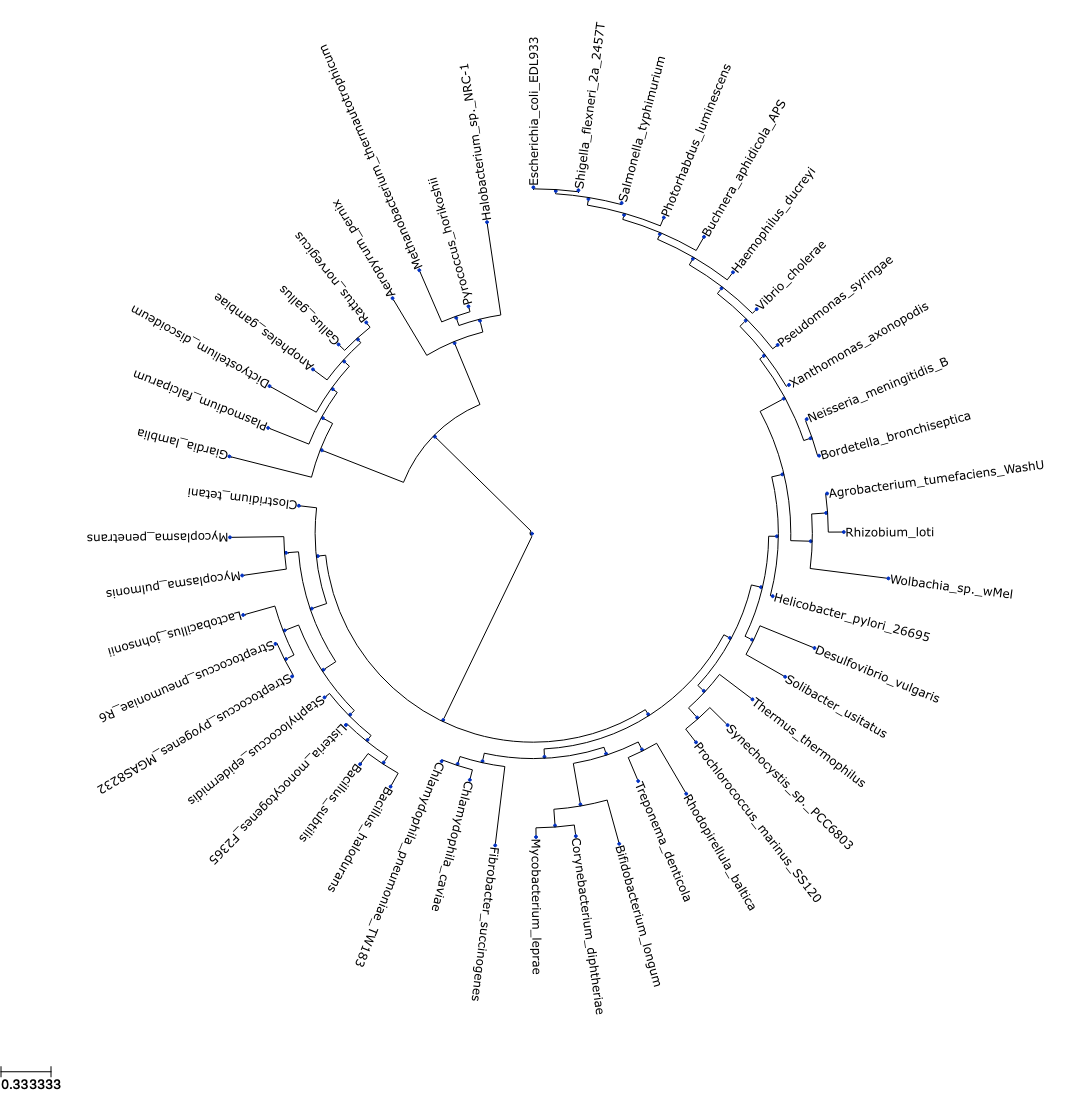

In [46]:
ts = TreeStyle()
ts.layout_fn = custom_layout
ts.mode = 'c'
ts.arc_start = 270
ts.scale = 150
ts.show_leaf_name = False
t.render("%%inline", tree_style=ts)